In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from decimal import Decimal

# Study data files
cleaned_data_path = "Data/data_cleaning.csv"
stacked_data_path = "Data/data_cleaning_stacked.csv"

# Read the mouse data and the study results
movie_clean = pd.read_csv(cleaned_data_path, index_col=0)
movie_stacked = pd.read_csv(stacked_data_path, index_col=0)

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Bin data by decade
decade_bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]
decade_names = ['1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019']

### Cleaned Data

In [3]:
# Display the data table for cleaned data
movie_clean.head()


,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
0,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,"Drama, Romance, War",150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.20,2935,"$9,183,673.00","$128,831,540.56"
1,tt0017136,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.30,148396,"$1,236,166.00","$17,839,651.48"
2,tt0017354,The Sea Beast,1926,1926-01-15,"Action, Adventure, Fantasy",136,USA,English,Millard Webb,"Herman Melville, Bess Meredyth",Warner Bros.,"John Barrymore, Dolores Costello, George O'Har...",6.50,126,"$814,000.00","$11,548,084.63"
3,tt0021749,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Virginia Cherrill, Florence Lee, Harry Myers, ...",8.50,152716,"$19,181.00","$316,873.91"
4,tt0027977,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Paulette Goddard, Henry Bergm...",8.50,197969,"$163,577.00","$2,955,059.69"


### Stacked Data Analysis

In [4]:
# Remove leading space in genre
movie_stacked['Genre'] = movie_stacked['Genre'].str.lstrip()

# Display the data table for stacked data
movie_stacked.head()

,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
0,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,Drama,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.20,2935,"$9,183,673.00","$131,165,937.89"
1,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,Romance,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.20,2935,"$9,183,673.00","$131,165,937.89"
2,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,War,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.20,2935,"$9,183,673.00","$131,165,937.89"
3,tt0017136,Metropolis,1927,1927-02-06,Drama,153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.30,148396,"$1,236,166.00","$18,162,901.79"
4,tt0017136,Metropolis,1927,1927-02-06,Sci-Fi,153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.30,148396,"$1,236,166.00","$18,162,901.79"


In [5]:
# Cut stacked data by decade
movie_stacked["Decade"] = pd.cut(movie_stacked["Year"], decade_bins, labels=decade_names, include_lowest=True)
movie_stacked.head()

# Output file to csv
movie_stacked.to_csv(r'Data\movie_stacked_nc.csv', index=False)

In [6]:
# Group stacked data by decade and count how many records
stacked_decade = movie_stacked.groupby('Decade')
stacked_decade.count()


,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
Decade,,,,,,,,,,,,,,,,
1920-1929,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
1930-1939,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
1940-1949,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
1950-1959,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
1960-1969,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
1970-1979,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572
1980-1989,3108,3108,3108,3108,3108,3108,3108,3108,3108,3108,3085,3108,3108,3108,3108,3108
1990-1999,4374,4374,4374,4374,4374,4374,4374,4371,4374,4372,4363,4374,4374,4374,4374,4374
2000-2009,5459,5459,5459,5459,5459,5459,5459,5447,5457,5449,5402,5457,5459,5459,5459,5459


In [7]:
# Create a variable for each decade with more than 500 records
decade_70 = (movie_stacked[movie_stacked['Decade'] == '1970-1979']).reset_index(drop=True)
decade_80 = (movie_stacked[movie_stacked['Decade'] == '1980-1989']).reset_index(drop=True)
decade_90 = (movie_stacked[movie_stacked['Decade'] == '1990-1999']).reset_index(drop=True)
decade_00 = (movie_stacked[movie_stacked['Decade'] == '2000-2009']).reset_index(drop=True)
decade_10 = (movie_stacked[movie_stacked['Decade'] == '2010-2019']).reset_index(drop=True)

## Create DataFrame and Bar Chart for Each Decade

### 1970's

In [44]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_70_groupby = decade_70.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_70_df = pd.DataFrame(decade_70_groupby)
decade_70_df['%'] = ((decade_70_df['Decade'] / decade_70_df['Decade'].sum())*100).round(1).astype(float)


decade_70_df.reset_index()

,Genre,Decade,%
0,Drama,137,24.00
1,Comedy,87,15.20
2,Action,41,7.20
3,Romance,40,7.00
4,Adventure,39,6.80
5,Crime,38,6.60
6,Thriller,38,6.60
7,Mystery,21,3.70
8,Sci-Fi,19,3.30
9,Sport,17,3.00


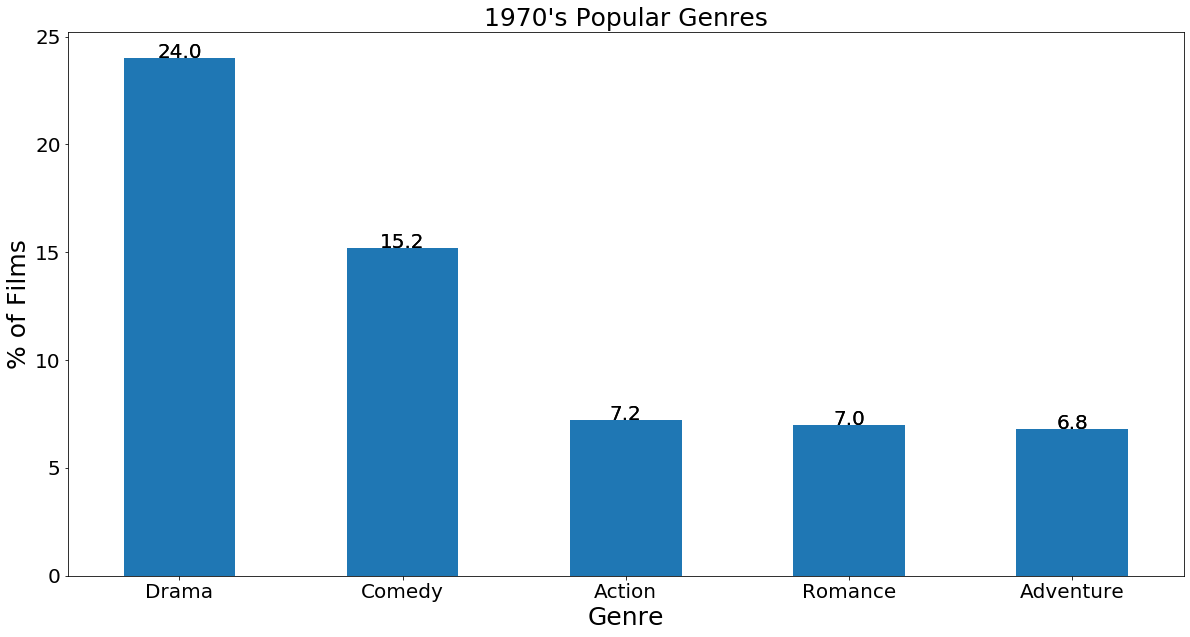

In [9]:
# Plot bar chart
ax = decade_70_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_70_df.columns:
    for id, val in enumerate(decade_70_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1970's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### 1980's

In [10]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_80_groupby = decade_80.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_80_df = pd.DataFrame(decade_80_groupby)
decade_80_df['%'] = ((decade_80_df['Decade'] / decade_80_df['Decade'].sum())*100).round(1).astype(float)


decade_80_df.reset_index()

,Genre,Decade,%
0,Drama,654,21.00
1,Comedy,576,18.50
2,Action,274,8.80
3,Crime,253,8.10
4,Romance,245,7.90
5,Adventure,178,5.70
6,Thriller,174,5.60
7,Horror,146,4.70
8,Fantasy,99,3.20
9,Mystery,90,2.90


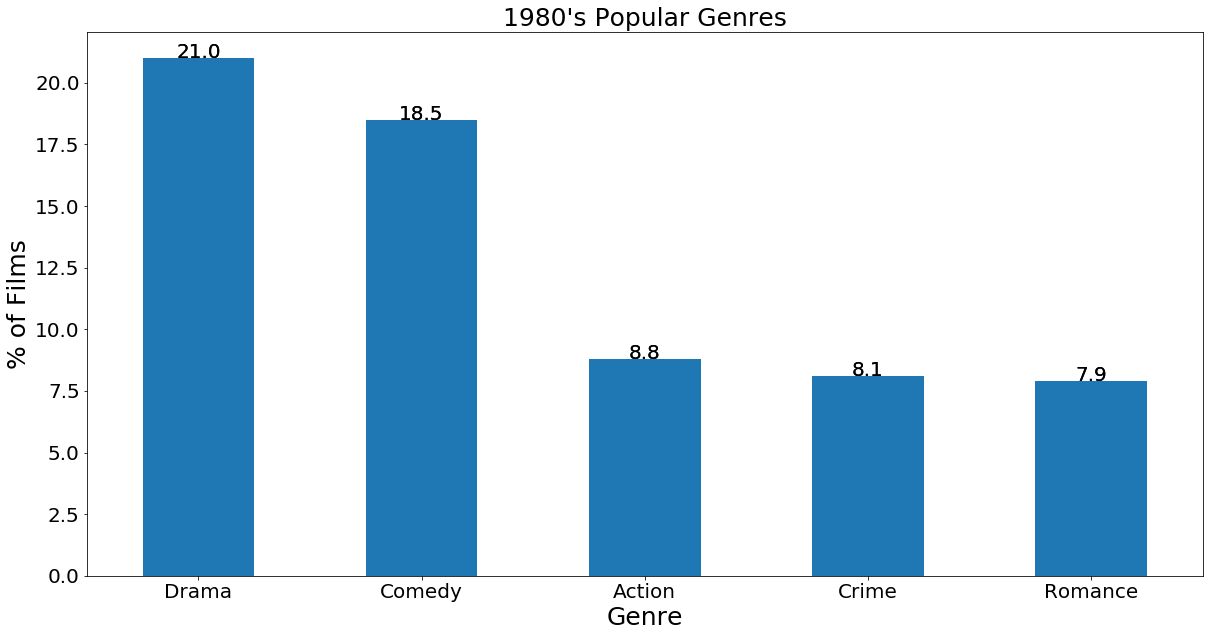

In [11]:
# Plot bar chart
ax = decade_80_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_80_df.columns:
    for id, val in enumerate(decade_80_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1980's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### 1990's

In [12]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_90_groupby = decade_90.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_90_df = pd.DataFrame(decade_90_groupby)
decade_90_df['%'] = ((decade_90_df['Decade'] / decade_90_df['Decade'].sum())*100).round(1).astype(float)


decade_90_df.reset_index()

,Genre,Decade,%
0,Drama,1043,23.80
1,Comedy,832,19.00
2,Romance,385,8.80
3,Crime,383,8.80
4,Action,340,7.80
5,Thriller,262,6.00
6,Adventure,223,5.10
7,Family,144,3.30
8,Mystery,119,2.70
9,Horror,113,2.60


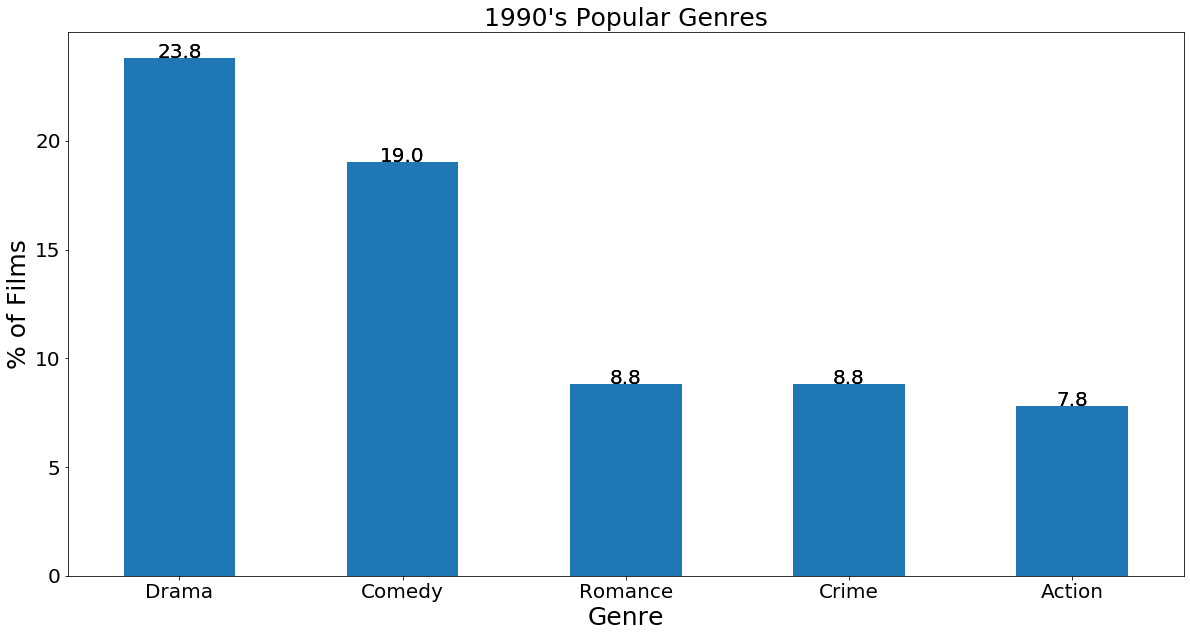

In [13]:
# Plot bar chart
ax = decade_90_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_90_df.columns:
    for id, val in enumerate(decade_90_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1990's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### 2000's

In [14]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_00_groupby = decade_00.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_00_df = pd.DataFrame(decade_00_groupby)
decade_00_df['%'] = ((decade_00_df['Decade'] / decade_90_df['Decade'].sum())*100).round(1).astype(float)


decade_00_df.reset_index()

,Genre,Decade,%
0,Drama,1230,28.10
1,Comedy,972,22.20
2,Romance,518,11.80
3,Action,439,10.00
4,Crime,416,9.50
5,Adventure,326,7.50
6,Thriller,284,6.50
7,Mystery,196,4.50
8,Family,163,3.70
9,Horror,159,3.60


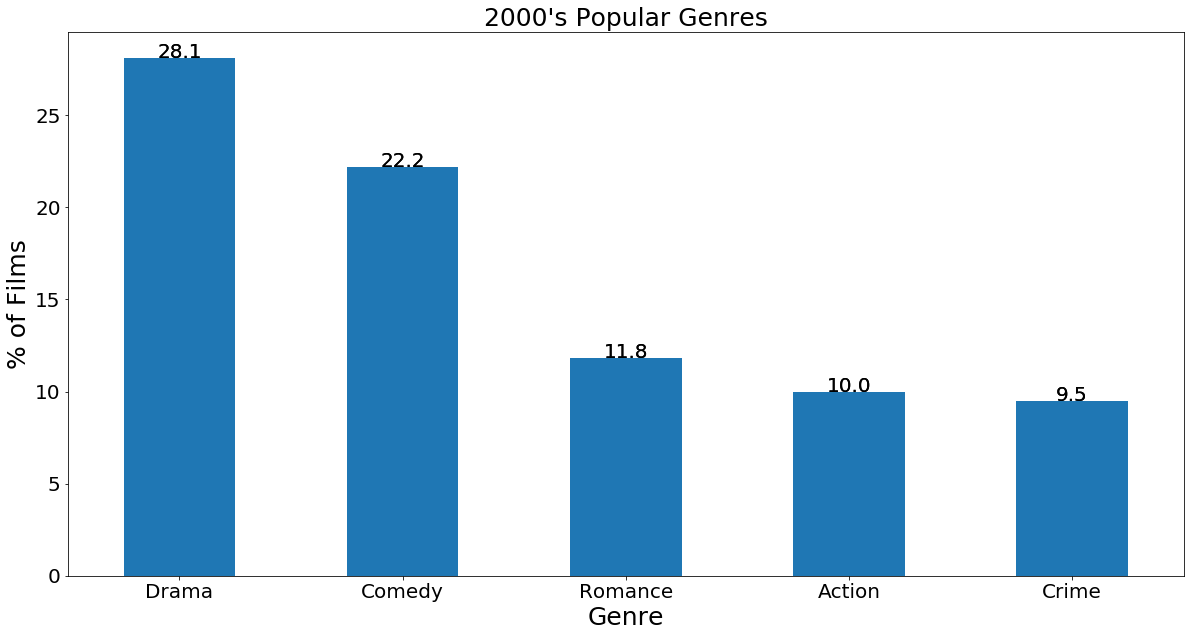

In [15]:
# Plot bar chart
ax = decade_00_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_00_df.columns:
    for id, val in enumerate(decade_00_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("2000's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### 2010's

In [16]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_10_groupby = decade_10.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_10_df = pd.DataFrame(decade_10_groupby)
decade_10_df['%'] = ((decade_10_df['Decade'] / decade_90_df['Decade'].sum())*100).round(1).astype(float)


decade_10_df.reset_index()

,Genre,Decade,%
0,Drama,1178,26.90
1,Comedy,803,18.40
2,Action,521,11.90
3,Romance,350,8.00
4,Thriller,344,7.90
5,Adventure,326,7.50
6,Crime,296,6.80
7,Horror,200,4.60
8,Biography,193,4.40
9,Mystery,155,3.50


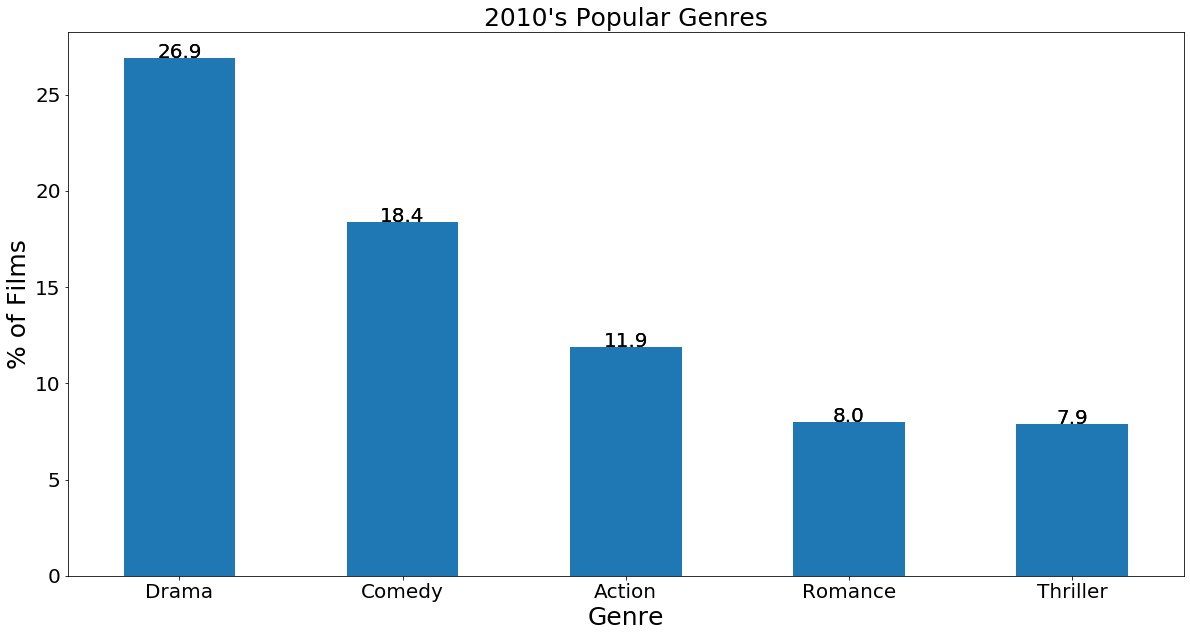

In [17]:
# Plot bar chart
ax = decade_10_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_10_df.columns:
    for id, val in enumerate(decade_10_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("2010's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### Financial Data by Genre

In [321]:
# Create one DataFrame with data from 1970-2019
narrowed_genre = (movie_stacked[(movie_stacked['Decade'] == '1970-1979') | (movie_stacked['Decade'] == '1980-1989')
                                     | (movie_stacked['Decade'] == '1990-1999') | (movie_stacked['Decade'] == '1990-1999')
                                     | (movie_stacked['Decade'] == '2000-2009') | (movie_stacked['Decade'] == '2010-2019')])

# Save output
narrowed_genre.to_csv(r'Data\narrowed_genre_nc.csv', index=False)

# Make copy of dataframe
narrowed_genre_2 = narrowed_genre.copy()

# Strip the currency sign from Adjusted Gross and make a float variable
narrowed_genre_2['Lifetime Gross - Adjusted ($)']=(narrowed_genre_2['Lifetime Gross - Adjusted ($)'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float))


# Display Dataframe
narrowed_genre_2

,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($),Decade
184,tt0065134,Two Mules for Sister Sara,1970,1971-03-26,Adventure,116,"Mexico, USA","English, Spanish, French, Latin",Don Siegel,"Budd Boetticher, Albert Maltz",The Malpaso Company,"Shirley MacLaine, Clint Eastwood, Manolo Fábre...",7.00,21903,"$5,050,000.00","33,274,944.59",1970-1979
185,tt0065134,Two Mules for Sister Sara,1970,1971-03-26,Romance,116,"Mexico, USA","English, Spanish, French, Latin",Don Siegel,"Budd Boetticher, Albert Maltz",The Malpaso Company,"Shirley MacLaine, Clint Eastwood, Manolo Fábre...",7.00,21903,"$5,050,000.00","33,274,944.59",1970-1979
186,tt0065134,Two Mules for Sister Sara,1970,1971-03-26,War,116,"Mexico, USA","English, Spanish, French, Latin",Don Siegel,"Budd Boetticher, Albert Maltz",The Malpaso Company,"Shirley MacLaine, Clint Eastwood, Manolo Fábre...",7.00,21903,"$5,050,000.00","33,274,944.59",1970-1979
190,tt0065377,Airport,1970,1970-07-31,Action,137,USA,"English, Italian","George Seaton, Henry Hathaway","Arthur Hailey, George Seaton",Universal Pictures,"Burt Lancaster, Dean Martin, Jean Seberg, Jacq...",6.60,16269,"$100,489,151.00","662,132,857.66",1970-1979
191,tt0065377,Airport,1970,1970-07-31,Drama,137,USA,"English, Italian","George Seaton, Henry Hathaway","Arthur Hailey, George Seaton",Universal Pictures,"Burt Lancaster, Dean Martin, Jean Seberg, Jacq...",6.60,16269,"$100,489,151.00","662,132,857.66",1970-1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18750,tt8427036,Helicopter Eela,2018,2018-10-12,Drama,135,India,Hindi,Pradeep Sarkar,"Mitesh Shah, Anand Gandhi",Ajay Devgn Ffilms,"Kajol, Riddhi Sen, Tota Roy Chowdhury, Neha Dh...",5.50,800,"$71,971.00","73,275.10",2010-2019
18751,tt8581198,Jane and Emma,2018,2018-10-12,Drama,90,USA,English,Chantelle Squires,Melissa Leilani Larson,NaN,"Danielle Deadwyler, Emily Goss, Brad Schmidt, ...",5.90,115,"$380,030.00","386,916.05",2010-2019
18752,tt8925540,Racetime,2018,2018-12-14,Animation,89,Canada,English,"Benoît Godbout, Jean-François Pouliot","Claude Landry, Maxime Landry",CarpeDiem Film & TV,"Sonja Ball, Hélène Bourgeois Leclerc, Mehdi Bo...",5.40,227,"$1,875,283.00","1,909,262.69",2010-2019
18753,tt8925540,Racetime,2018,2018-12-14,Adventure,89,Canada,English,"Benoît Godbout, Jean-François Pouliot","Claude Landry, Maxime Landry",CarpeDiem Film & TV,"Sonja Ball, Hélène Bourgeois Leclerc, Mehdi Bo...",5.40,227,"$1,875,283.00","1,909,262.69",2010-2019


## Rating by Genre

In [20]:
# Create a variable for each decade with more than 500 records
rating_70 = (movie_stacked[movie_stacked['Decade'] == '1970-1979']).reset_index(drop=True)
rating_80 = (movie_stacked[movie_stacked['Decade'] == '1980-1989']).reset_index(drop=True)
rating_90 = (movie_stacked[movie_stacked['Decade'] == '1990-1999']).reset_index(drop=True)
rating_00 = (movie_stacked[movie_stacked['Decade'] == '2000-2009']).reset_index(drop=True)
rating_10 = (movie_stacked[movie_stacked['Decade'] == '2010-2019']).reset_index(drop=True)

### 1970's Rating

In [21]:
rating_70_groupby = rating_70.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_70_df = pd.DataFrame(rating_70_groupby)

rating_70_df.reset_index()

,Genre,Avg Rating
0,Biography,7.59
1,War,7.08
2,Crime,7.07
3,Musical,7.04
4,History,6.96
5,Animation,6.90
6,Music,6.85
7,Western,6.82
8,Mystery,6.81
9,Drama,6.78


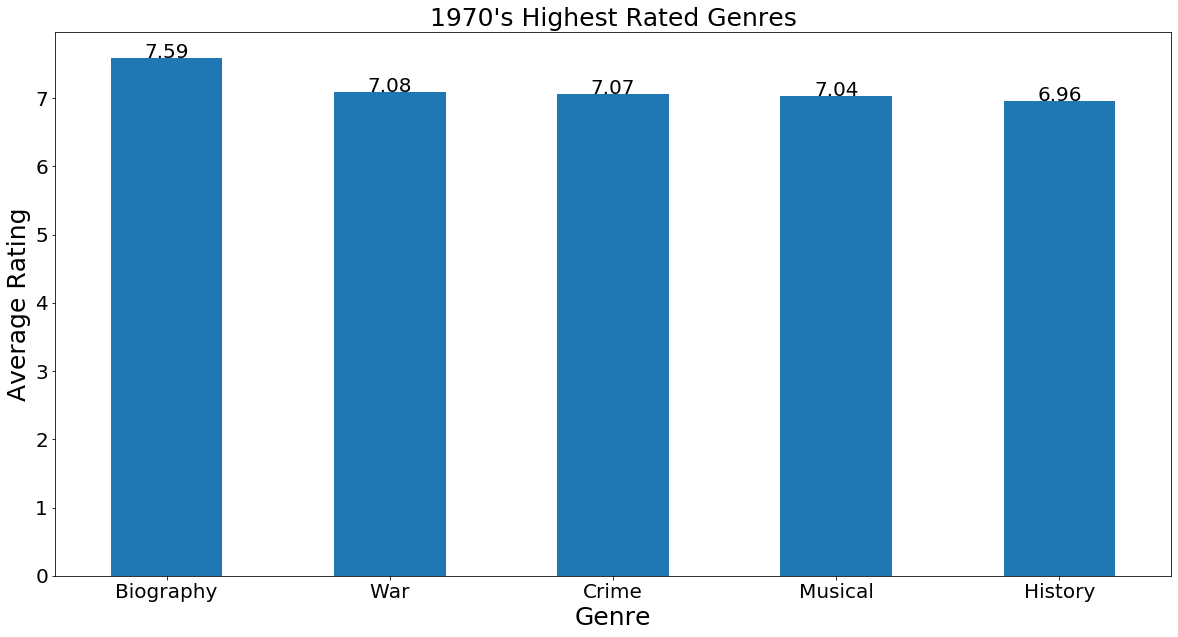

In [22]:
# Plot bar chart
ax = rating_70_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_70_df.columns:
    for id, val in enumerate(rating_70_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1970's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


plt.show()

### 1980's Rating

In [23]:
rating_80_groupby = rating_80.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_80_df = pd.DataFrame(rating_80_groupby)

rating_80_df.reset_index()

,Genre,Avg Rating
0,History,7.11
1,Biography,6.96
2,Animation,6.82
3,War,6.40
4,Drama,6.39
5,Adventure,6.20
6,Family,6.19
7,Crime,6.18
8,Music,6.17
9,Sci-Fi,6.15


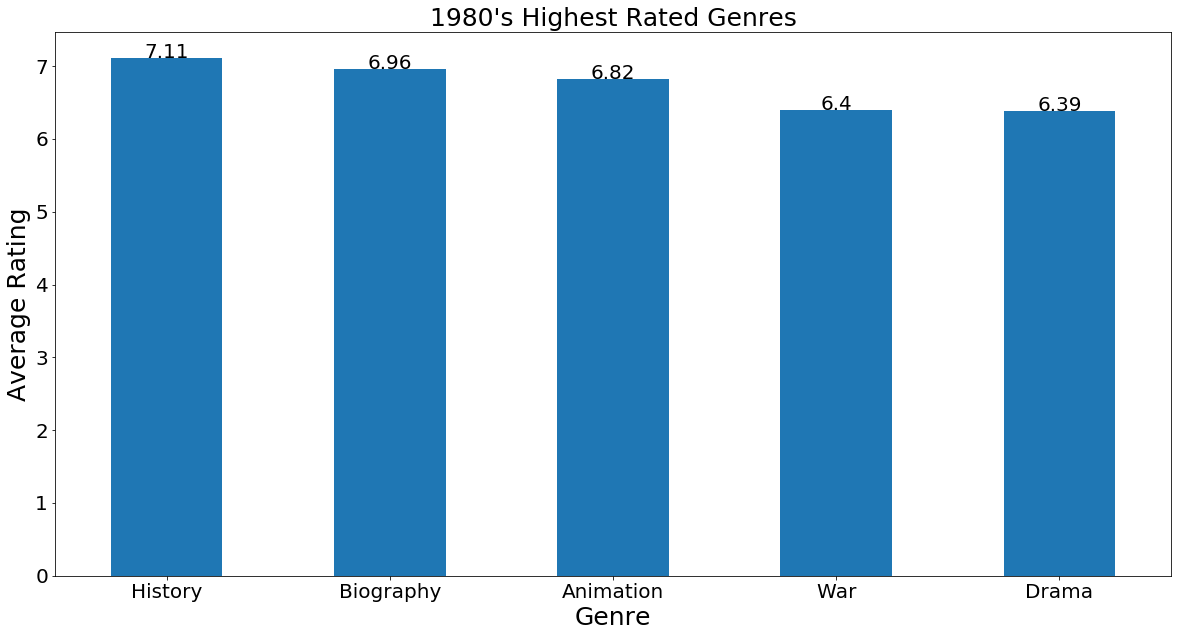

In [24]:
# Plot bar chart
ax = rating_80_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_80_df.columns:
    for id, val in enumerate(rating_80_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1980's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


plt.show()

### 1990's Rating

In [25]:
rating_90_groupby = rating_90.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_90_df = pd.DataFrame(rating_90_groupby)

rating_90_df.reset_index()

,Genre,Avg Rating
0,History,7.05
1,Biography,6.97
2,Animation,6.76
3,War,6.54
4,Music,6.52
5,Western,6.50
6,Drama,6.50
7,Mystery,6.36
8,Crime,6.29
9,Romance,6.26


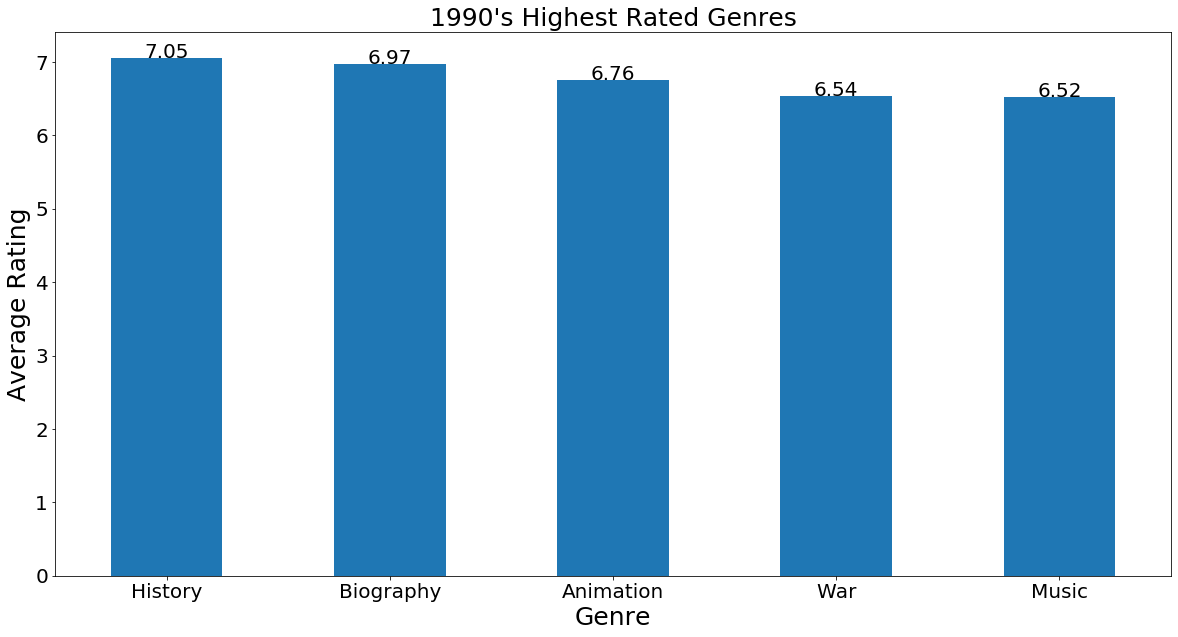

In [26]:
# Plot bar chart
ax = rating_90_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_90_df.columns:
    for id, val in enumerate(rating_90_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1990's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


plt.show()

### 2000's Rating

In [27]:
rating_00_groupby = rating_00.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_00_df = pd.DataFrame(rating_00_groupby)

rating_00_df.reset_index()

,Genre,Avg Rating
0,History,6.99
1,Biography,6.98
2,War,6.73
3,Drama,6.44
4,Animation,6.32
5,Crime,6.21
6,Thriller,6.17
7,Sci-Fi,6.16
8,Mystery,6.15
9,Sport,6.13


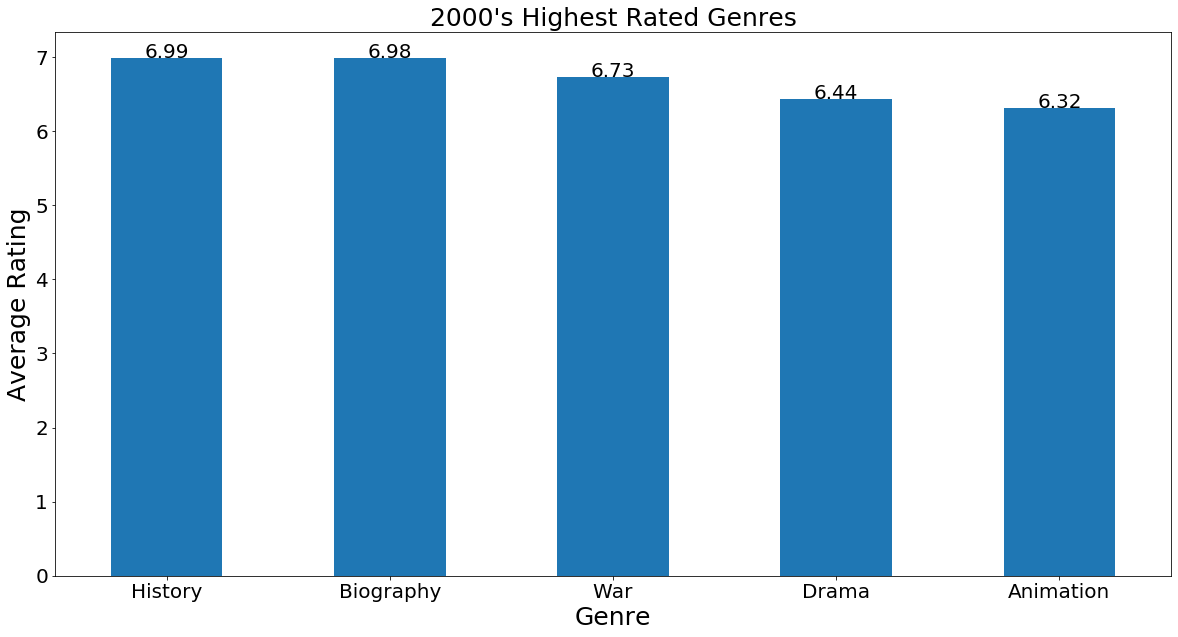

In [28]:
# Plot bar chart
ax = rating_00_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_00_df.columns:
    for id, val in enumerate(rating_00_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("2000's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


plt.show()

### 2010's Rating

In [29]:
rating_10_groupby = rating_10.groupby('Genre').mean()['Avg Rating'].sort_values(ascending=False)
rating_10_df = pd.DataFrame(rating_10_groupby)

rating_10_df.reset_index()

,Genre,Avg Rating
0,Biography,6.89
1,History,6.65
2,Sport,6.57
3,Western,6.51
4,Animation,6.51
5,Adventure,6.38
6,Drama,6.34
7,Music,6.28
8,Sci-Fi,6.26
9,Crime,6.18


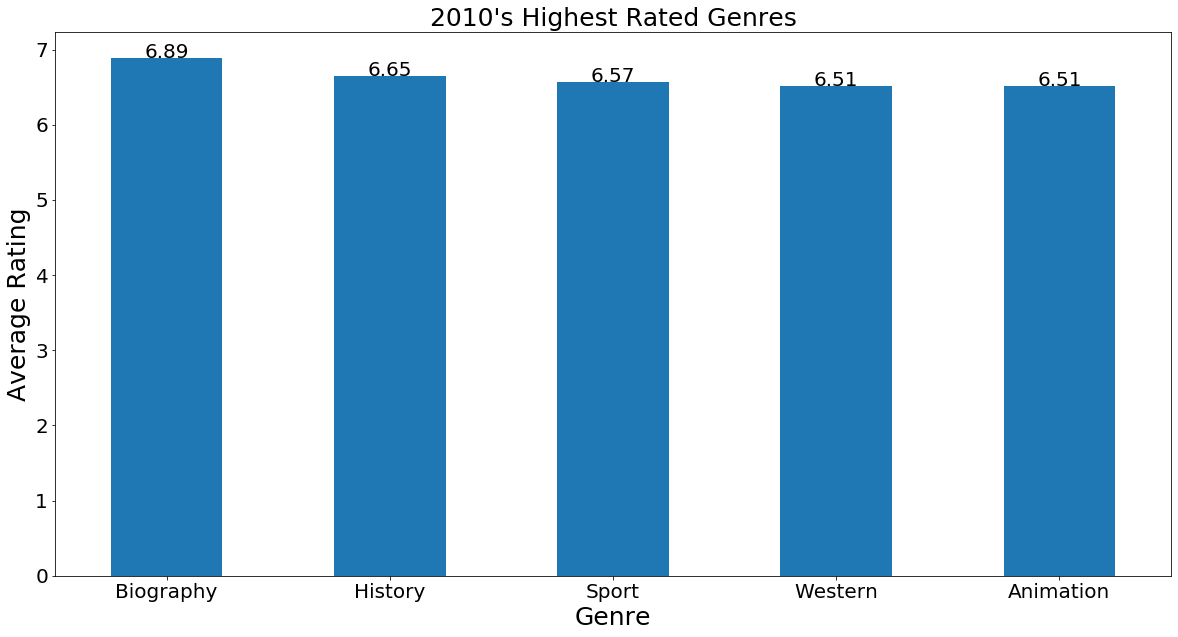

In [30]:
# Plot bar chart
ax = rating_10_df.iloc[0:5].plot(y='Avg Rating', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in rating_10_df.columns:
    for id, val in enumerate(rating_10_df['Avg Rating'].iloc[0:5]):
        ax.text(id, val, round(val,2), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("2010's Highest Rated Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)


plt.show()

## Rating by Genre

### 1970's Rating by Genre

In [176]:
decade_70_combined = pd.concat([decade_70_df, rating_70_df], axis=1)
decade_70_combined[['%', "Avg Rating"]]
decade_70_combined

,Decade,%,Avg Rating
Drama,137,24.00,6.78
Comedy,87,15.20,6.51
Action,41,7.20,6.46
Romance,40,7.00,6.39
Adventure,39,6.80,6.52
Crime,38,6.60,7.07
Thriller,38,6.60,6.76
Mystery,21,3.70,6.81
Sci-Fi,19,3.30,6.35
Sport,17,3.00,5.99


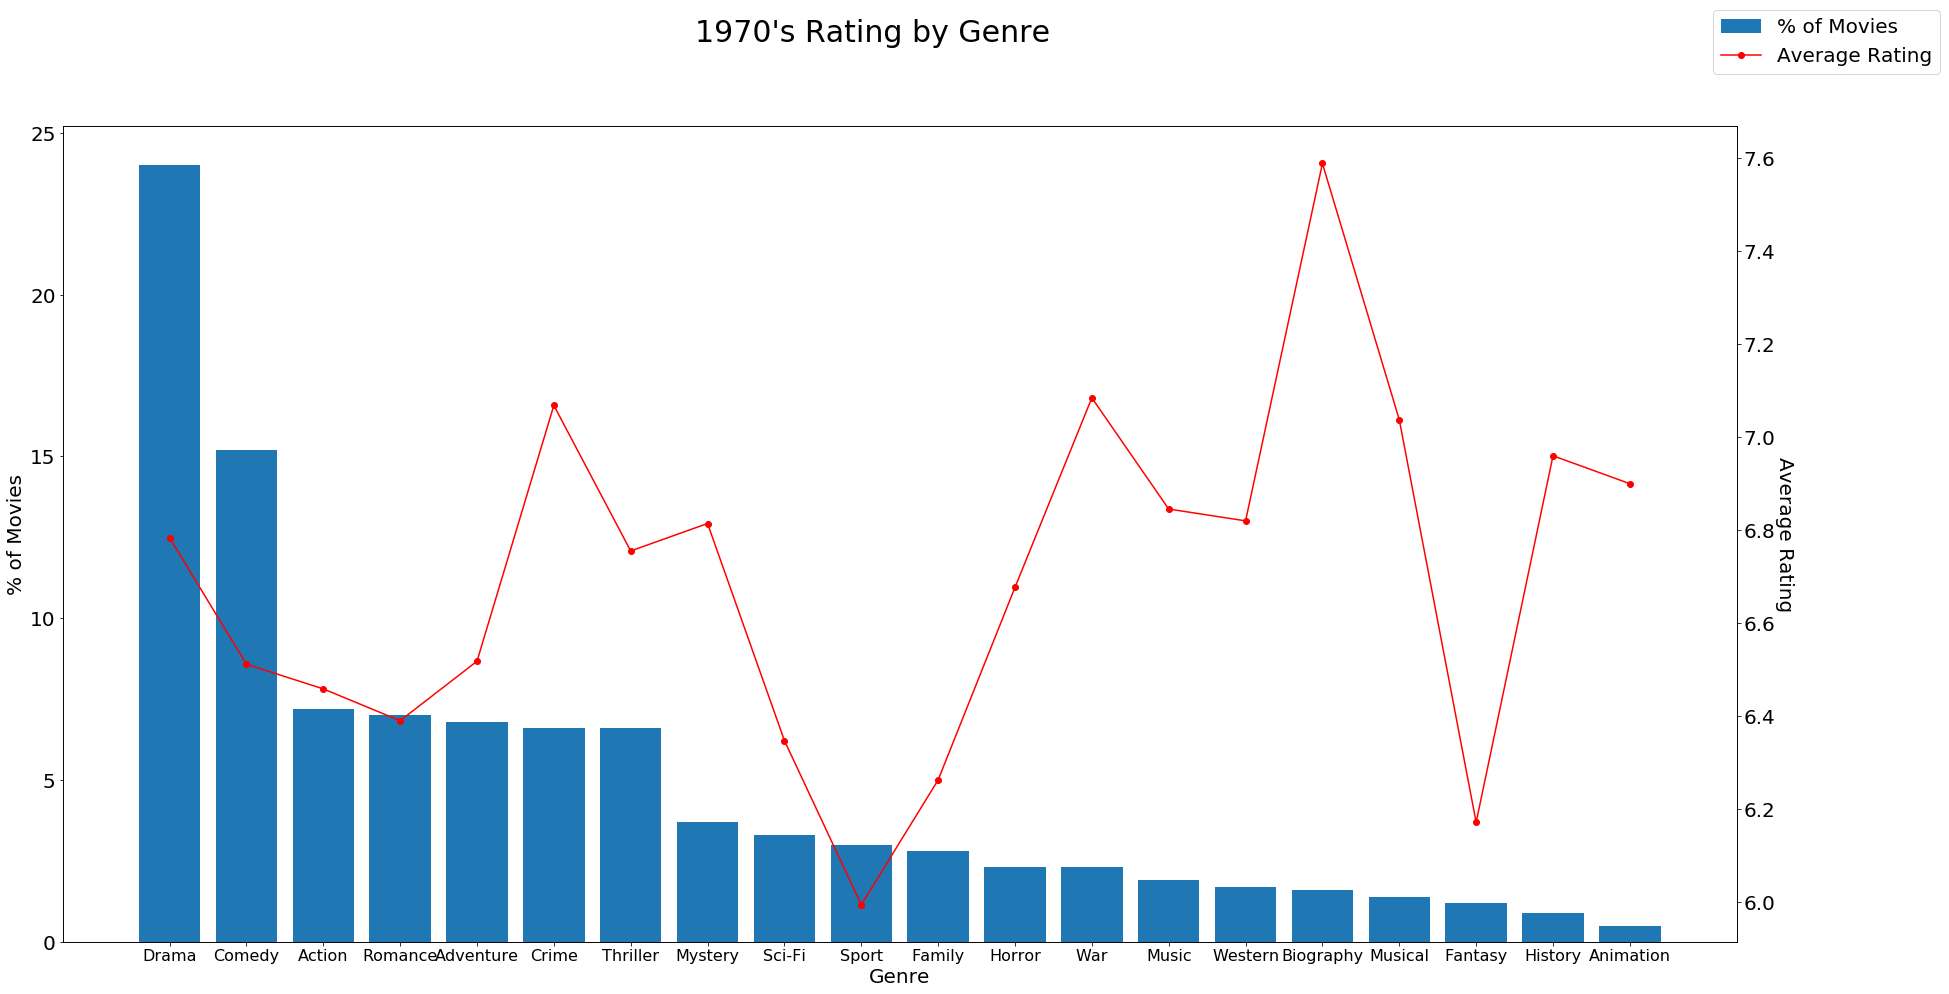

In [275]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_70_combined.index, decade_70_combined["%"], label='% of Movies')
ax2.plot(decade_70_combined.index, decade_70_combined["Avg Rating"], color='red', label='Average Rating', marker='o')

# Format chart

fig.legend(loc='upper right', fontsize=20)
fig.suptitle("1970's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_70_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Show Chart
plt.show()

### 1980's Rating by Genre

In [178]:
decade_80_combined = pd.concat([decade_80_df, rating_80_df], axis=1)
decade_80_combined[['%', "Avg Rating"]]
decade_80_combined

,Decade,%,Avg Rating
Drama,654,21.00,6.39
Comedy,576,18.50,6.01
Action,274,8.80,5.99
Crime,253,8.10,6.18
Romance,245,7.90,6.15
Adventure,178,5.70,6.20
Thriller,174,5.60,6.06
Horror,146,4.70,5.98
Fantasy,99,3.20,6.05
Mystery,90,2.90,6.08


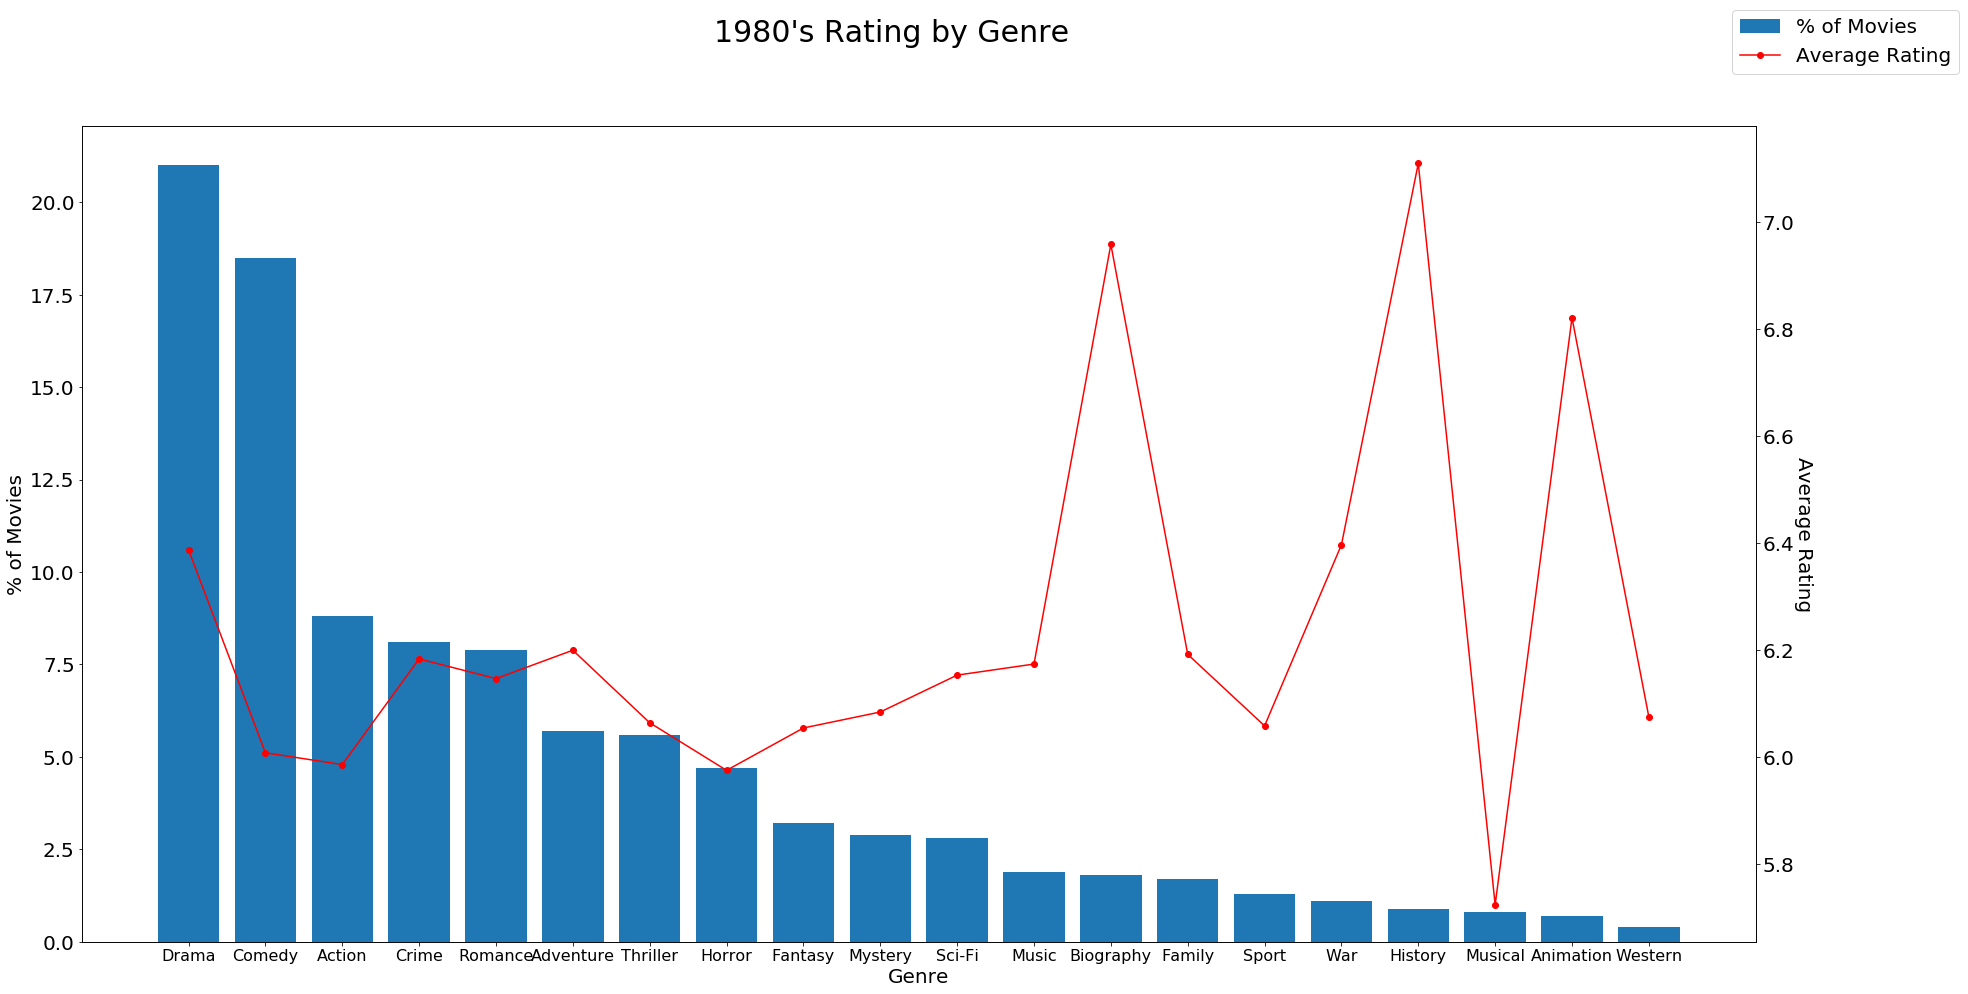

In [274]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_80_combined.index, decade_80_combined["%"], label='% of Movies')
ax2.plot(decade_80_combined.index, decade_80_combined["Avg Rating"], color='red', label='Average Rating', marker='o')

# Format chart

fig.legend(loc='upper right', fontsize=20)
fig.suptitle("1980's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_80_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Show Chart
plt.show()

### 1990's Rating by Genre

In [180]:
decade_90_combined = pd.concat([decade_90_df, rating_90_df], axis=1)
decade_90_combined[['%', "Avg Rating"]]
decade_90_combined

,Decade,%,Avg Rating
Drama,1043,23.80,6.50
Comedy,832,19.00,6.03
Romance,385,8.80,6.26
Crime,383,8.80,6.29
Action,340,7.80,5.95
Thriller,262,6.00,6.22
Adventure,223,5.10,6.10
Family,144,3.30,5.75
Mystery,119,2.70,6.36
Horror,113,2.60,5.72


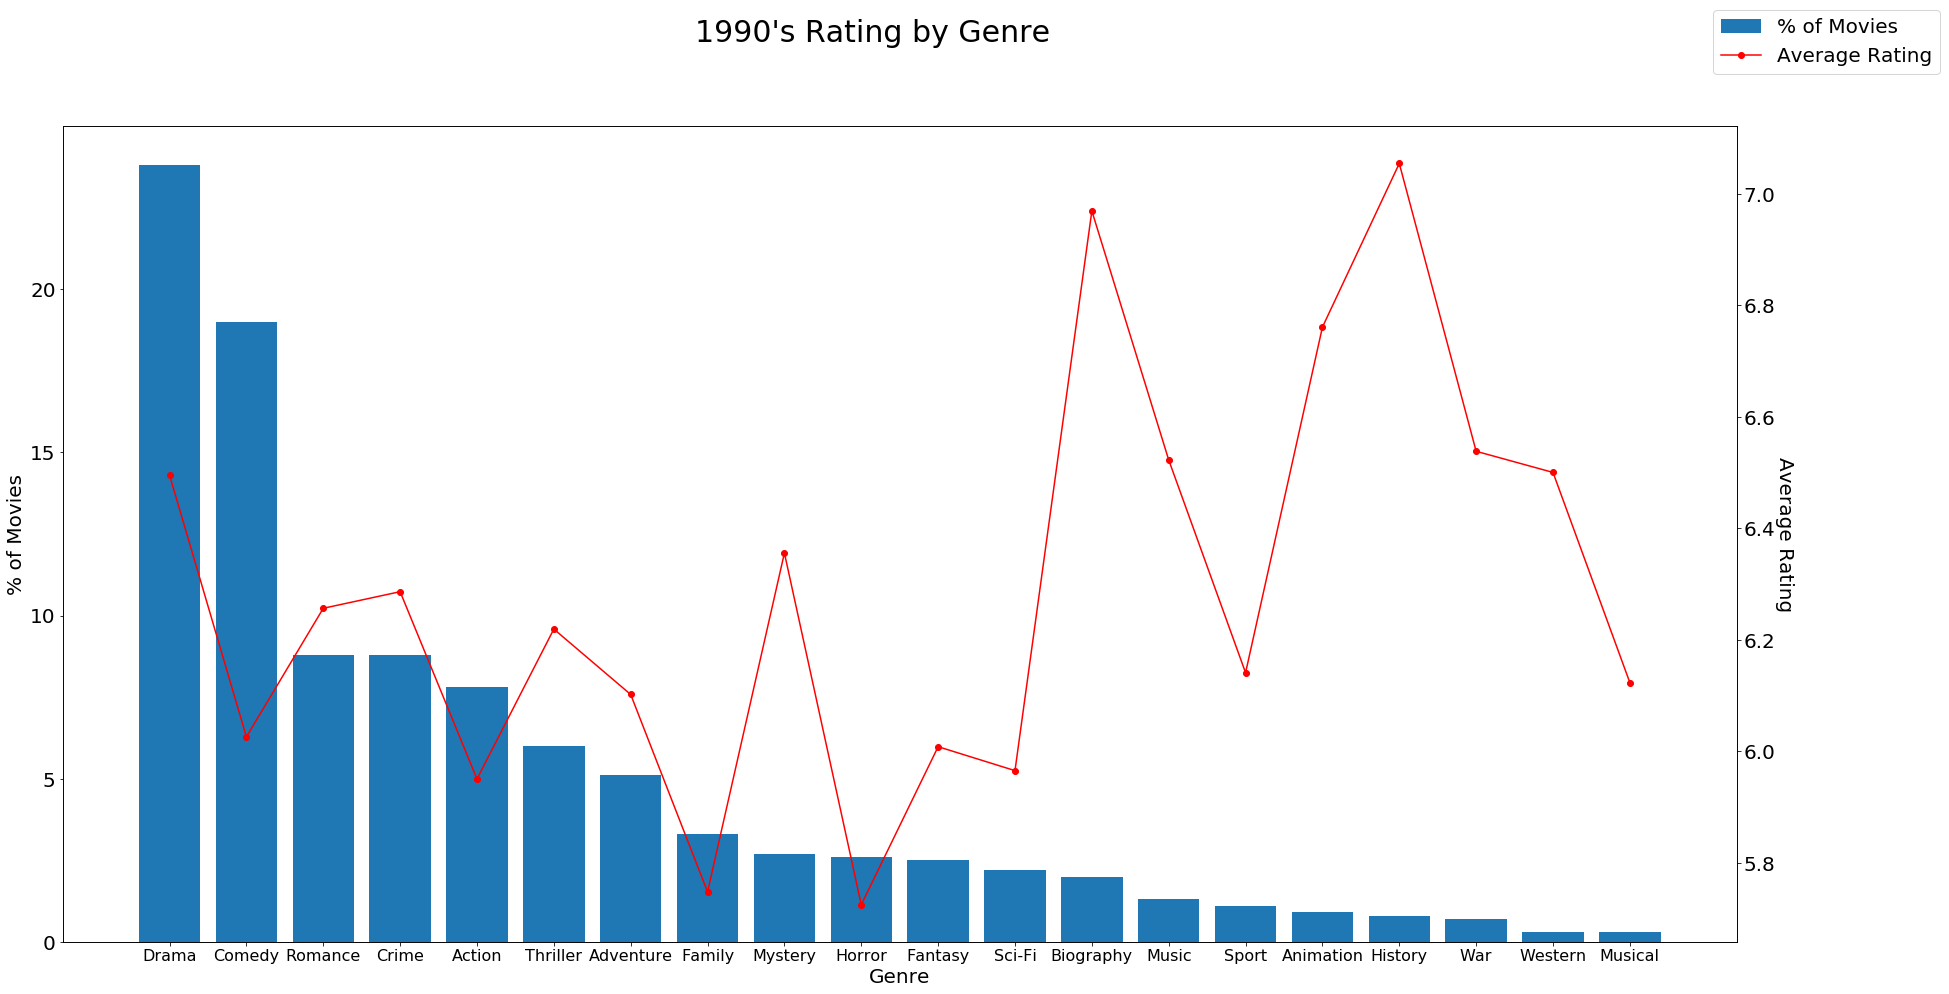

In [273]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_90_combined.index, decade_90_combined["%"], label='% of Movies')
ax2.plot(decade_90_combined.index, decade_90_combined["Avg Rating"], color='red', label='Average Rating', marker='o')

# Format chart

fig.legend(loc='upper right', fontsize=20)
fig.suptitle("1990's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_90_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Show Chart
plt.show()

### 2000's Rating by Genre

In [182]:
decade_00_combined = pd.concat([decade_00_df, rating_00_df], axis=1)
decade_00_combined[['%', "Avg Rating"]]
decade_00_combined

,Decade,%,Avg Rating
Drama,1230,28.10,6.44
Comedy,972,22.20,5.89
Romance,518,11.80,6.10
Action,439,10.00,5.99
Crime,416,9.50,6.21
Adventure,326,7.50,6.12
Thriller,284,6.50,6.17
Mystery,196,4.50,6.15
Family,163,3.70,5.73
Horror,159,3.60,5.62


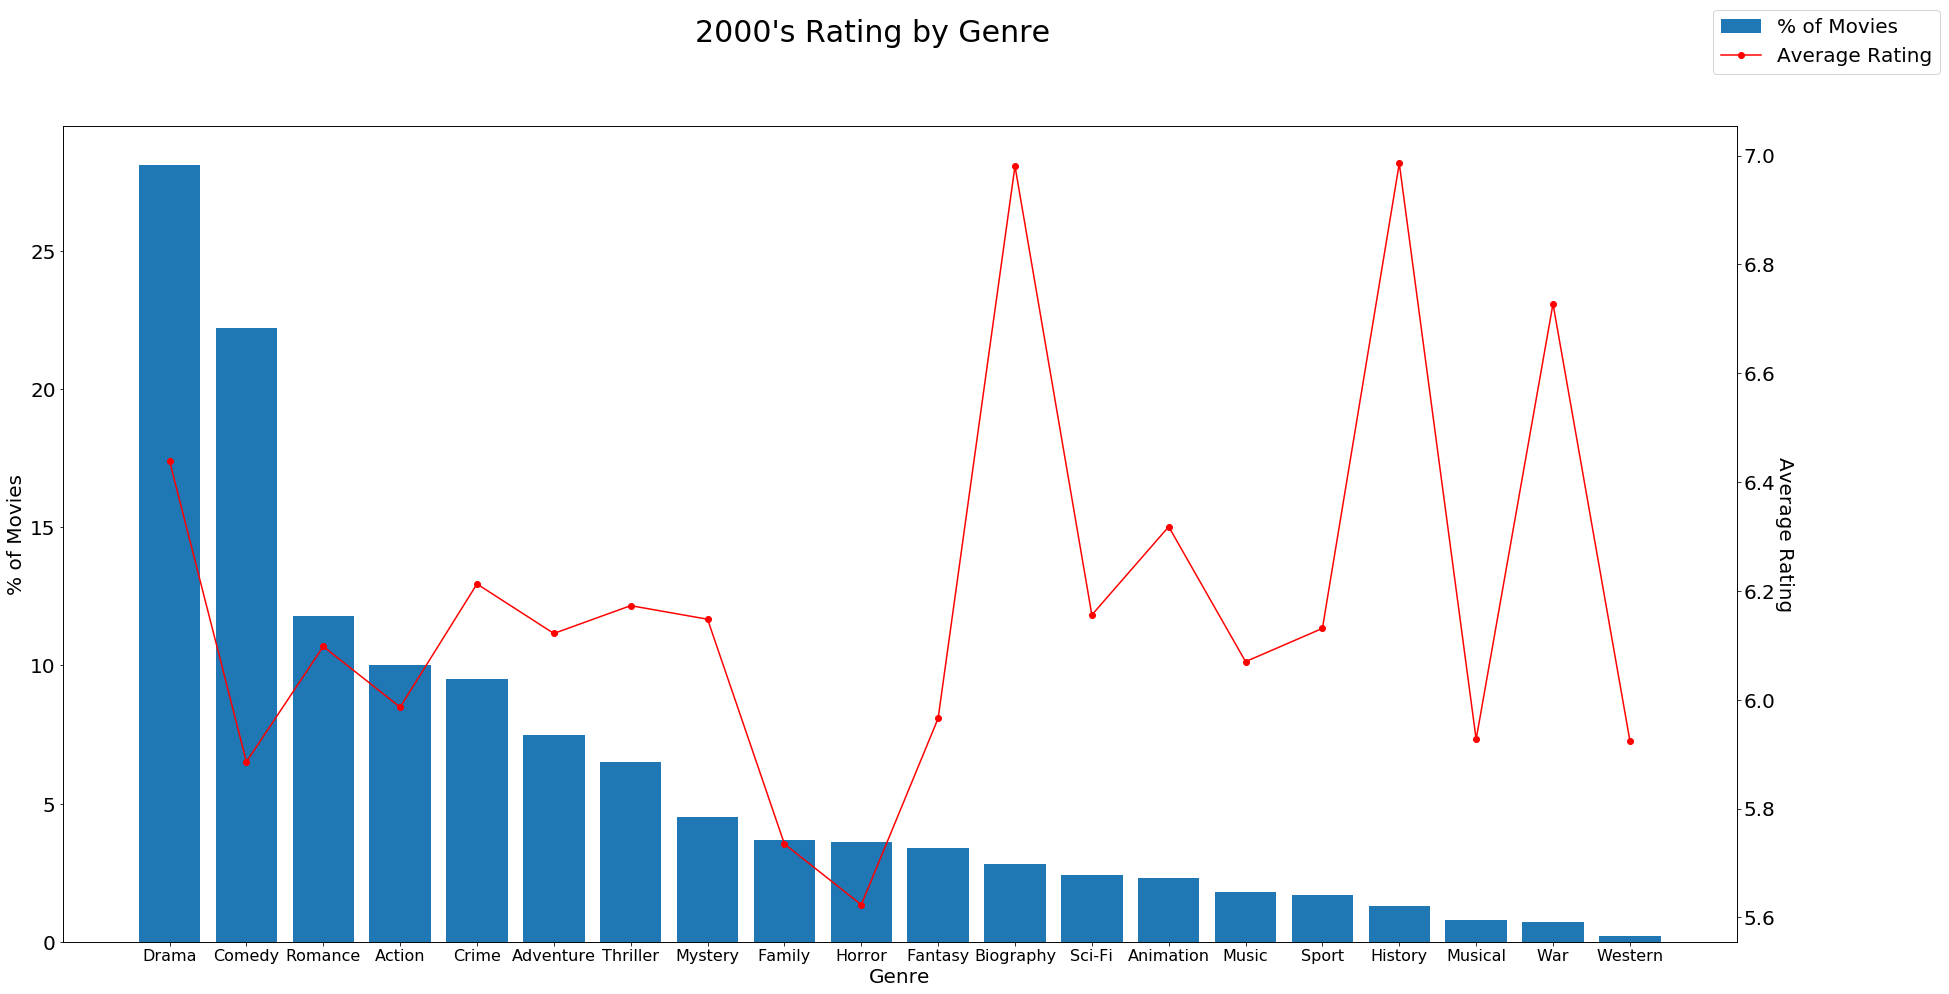

In [272]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_00_combined.index, decade_00_combined["%"], label='% of Movies')
ax2.plot(decade_00_combined.index, decade_00_combined["Avg Rating"], color='red', label='Average Rating', marker='o')

# Format chart

fig.legend(loc='upper right', fontsize=20)
fig.suptitle("2000's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_00_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Show Chart
plt.show()

### 2010's Ratings by Genre

In [184]:
decade_10_combined = pd.concat([decade_10_df, rating_10_df], axis=1)
decade_10_combined[['%', "Avg Rating"]]
decade_10_combined

,Decade,%,Avg Rating
Drama,1178,26.90,6.34
Comedy,803,18.40,6.00
Action,521,11.90,6.09
Romance,350,8.00,6.13
Thriller,344,7.90,5.88
Adventure,326,7.50,6.38
Crime,296,6.80,6.18
Horror,200,4.60,5.41
Biography,193,4.40,6.89
Mystery,155,3.50,5.99


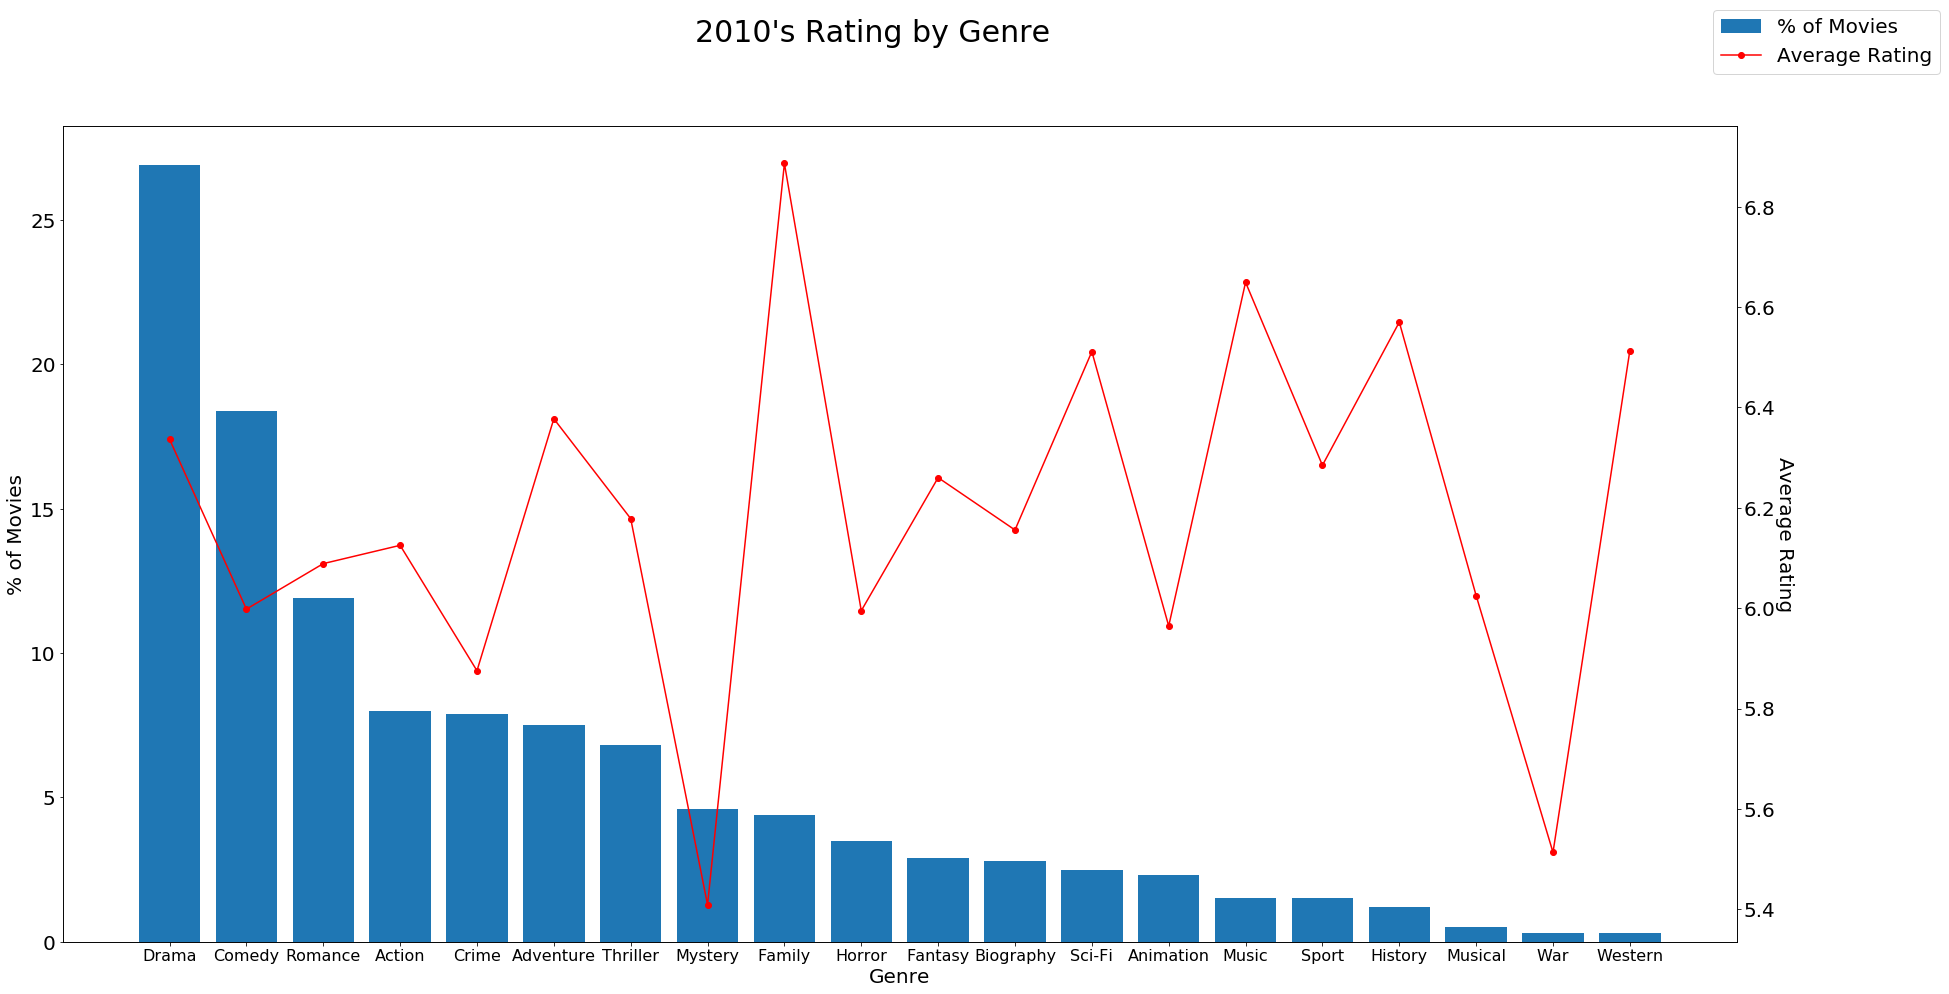

In [271]:
# Plot the average rating over the most popular genres
fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.bar(decade_10_combined.index, decade_10_combined["%"], label='% of Movies')
ax2.plot(decade_10_combined.index, decade_10_combined["Avg Rating"], color='red', label='Average Rating', marker='o')

# Format chart

fig.legend(loc='upper right', fontsize=20)
fig.suptitle("2010's Rating by Genre", fontsize=30)
ax.set_xticklabels(decade_00_combined.index)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)
ax2.set_ylabel('Average Rating', fontsize=20, rotation=270, va='baseline')

# Show Chart
plt.show()

In [375]:
# Group data by Decade & Genre
popular_genres = (narrowed_genre[(narrowed_genre['Genre'] == 'Drama') | (narrowed_genre['Genre'] == 'Comedy')
                                     | (narrowed_genre['Genre'] == 'Romance') | (narrowed_genre['Genre'] == 'Action')
                                     | (narrowed_genre['Genre'] == 'Crime') | (narrowed_genre['Genre'] == 'Adventure')
                                  | (narrowed_genre['Genre'] == 'Thriller')])


popular_genres_groupby = popular_genres.groupby(['Decade', 'Genre'])['Avg Rating'].mean().unstack().dropna(how='any')
popular_genres_df = pd.DataFrame(popular_genres_groupby)
popular_genres_df

Genre,Action,Adventure,Comedy,Crime,Drama,Romance,Thriller
Decade,,,,,,,
1920-1929,nan,nan,nan,nan,nan,nan,nan
1930-1939,nan,nan,nan,nan,nan,nan,nan
1940-1949,nan,nan,nan,nan,nan,nan,nan
1950-1959,nan,nan,nan,nan,nan,nan,nan
1960-1969,nan,nan,nan,nan,nan,nan,nan
1970-1979,6.46,6.52,6.51,7.07,6.78,6.39,6.76
1980-1989,5.99,6.20,6.01,6.18,6.39,6.15,6.06
1990-1999,5.95,6.10,6.03,6.29,6.50,6.26,6.22
2000-2009,5.99,6.12,5.89,6.21,6.44,6.10,6.17


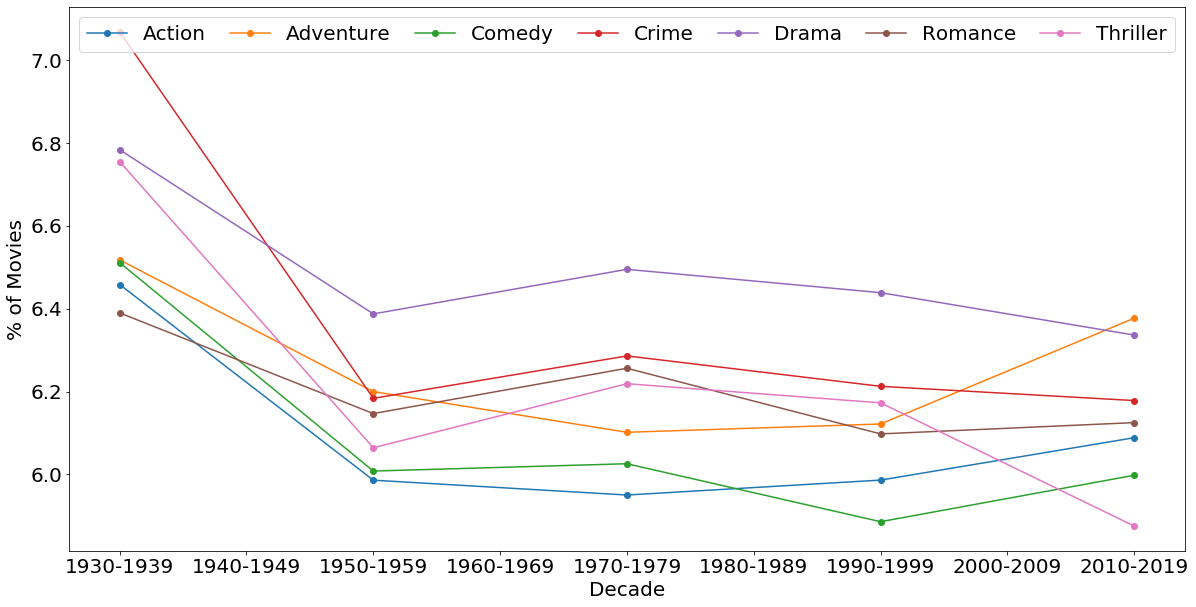

In [376]:
# Plot bar chart
ax = popular_genres_df.plot(kind="line", figsize=(20,10), rot=0, legend=False, fontsize = 20, marker='o')


ax.legend(loc="best", mode = "expand", ncol = 10)
ax.set_xticklabels(popular_genres_df.index)
# ax.xaxis.set_tick_params(labelsize=16)
# ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('Decade', fontsize=20)
ax.set_ylabel('% of Movies', fontsize=20)


plt.show()